##  04 Grabbing HTML tables with Pandas
What if you saw a table you wanted on a web page? For example: https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions.  

_Can Python help us download those data?_ **Why yes. Yes it can.**

Specifically, we use the Pandas' `read_html` function, which is able to identify tables in an HTML page and pull them out into a dataframe object.

In [1]:
#Import pandas
import pandas

#Install lxml if not present
try:
    import lxml
except:
    !pip install lxml
    print("Please restart the kernel")

In [2]:
#Here, the read_html function pulls into a list object any table in the URL we provide.
tableList = pandas.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions')
print ("{} tables were found".format(len(tableList)))

16 tables were found


In [3]:
#Let's grab the 2st table one and display it's first five rows
df = tableList[1]
df.head()

Country[20] Fossil CO2 emissions(Mt CO2)             \
                      Country[20]                         1990       2005   
0                           World                    22674.116  30049.809   
1  World – International Aviation                      258.941    422.777   
2  World – International Shipping                      371.804    572.169   
3                     Afghanistan                        2.546      1.063   
4                         Albania                        6.583      4.196   

             Fossil CO2 emissions                           \
        2017     2017(% of world) 2017 vs 1990: change (%)   
0  37077.404              100.00%                    63.5%   
1    543.381                1.47%                   109.8%   
2    677.248                1.83%                    82.2%   
3     11.422                0.03%                   348.6%   
4      5.026                0.01%                   -23.7%   

  2017 – Fossil CO2 emissions                           \
  Per land area(t CO2/km2/yr) Per capita(t CO2/cap/yr)   
0                        73.0                      4.9   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                        18.0                      0.3   
4                       175.0                      1.7   

    2018 CO2 emissions[21]                           
  Total including LUCF[22] Total excluding LUCF[23]  
0                 36431.11                 35247.21  
1                      NaN                      NaN  
2                      NaN                      NaN  
3                     7.59                     7.44  
4                     5.32                     5.56

What we see here is a table with two header rows (and Pandas was smart enough to recognize that). This is a multi-index table - a powerful, but confusing format. Basically, it allows us to means to select columns:

In [4]:
#Show the hierarchical column names
df.columns

MultiIndex([(                 'Country[20]',                 'Country[20]'),
            ('Fossil CO2 emissions(Mt CO2)',                        '1990'),
            ('Fossil CO2 emissions(Mt CO2)',                        '2005'),
            ('Fossil CO2 emissions(Mt CO2)',                        '2017'),
            (        'Fossil CO2 emissions',            '2017(% of world)'),
            (        'Fossil CO2 emissions',    '2017 vs 1990: change (%)'),
            ( '2017 – Fossil CO2 emissions', 'Per land area(t CO2/km2/yr)'),
            ( '2017 – Fossil CO2 emissions',    'Per capita(t CO2/cap/yr)'),
            (      '2018 CO2 emissions[21]',    'Total including LUCF[22]'),
            (      '2018 CO2 emissions[21]',    'Total excluding LUCF[23]')],
           )

In [5]:
#Select all rows and just the columns under the "Fossil CO2 emissions(Mt CO2)" heading
df_fossil = df.loc[:,'Fossil CO2 emissions(Mt CO2)']
df_fossil.head()

,1990,2005,2017
0,22674.116,30049.809,37077.404
1,258.941,422.777,543.381
2,371.804,572.169,677.248
3,2.546,1.063,11.422
4,6.583,4.196,5.026


In [6]:
#Let's add the country to our subset
df_fossil = df.loc[:,['Country[20]','Fossil CO2 emissions(Mt CO2)']]
df_fossil.head()

Country[20] Fossil CO2 emissions(Mt CO2)             \
                      Country[20]                         1990       2005   
0                           World                    22674.116  30049.809   
1  World – International Aviation                      258.941    422.777   
2  World – International Shipping                      371.804    572.169   
3                     Afghanistan                        2.546      1.063   
4                         Albania                        6.583      4.196   

              
        2017  
0  37077.404  
1    543.381  
2    677.248  
3     11.422  
4      5.026

In [7]:
#We can drop the top level column indices
df_fossil = df_fossil.droplevel(level=0,axis=1)
df_fossil.head()

,Country[20],1990,2005,2017
0,World,22674.116,30049.809,37077.404
1,World – International Aviation,258.941,422.777,543.381
2,World – International Shipping,371.804,572.169,677.248
3,Afghanistan,2.546,1.063,11.422
4,Albania,6.583,4.196,5.026


In [8]:
#Tidy up the column names
df_fossil.columns = ['Country','1990_emmissions','2005_emmissions','2017_emmissions']
#Set the country as the index
df_fossil.set_index('Country',inplace=True)
df_fossil.head()

,1990_emmissions,2005_emmissions,2017_emmissions
Country,,,
World,22674.116,30049.809,37077.404
World – International Aviation,258.941,422.777,543.381
World – International Shipping,371.804,572.169,677.248
Afghanistan,2.546,1.063,11.422
Albania,6.583,4.196,5.026


In [9]:
#Now we can save it to a local file using df.to_csv()
df_fossil.to_csv("CarbonEmissions.csv", # The output filename
          index=True,            # We opt not to write out the index
          encoding='utf8')       # This deals with issues surrounding countries with odd characters

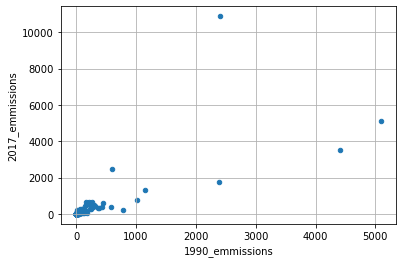

In [10]:
#...or we can examine it
#Here is as quick preview of pandas' plotting capability
%matplotlib inline
df_fossil.iloc[3:].plot.scatter(x='1990_emmissions',y='2017_emmissions',grid=True);